# UK ROAD ACCIDENTS DATA ANALYTICS
<hr>
<h4> Student:  John Marc De Villa </h4>
<h4> Year&Section: BSIT- 3A </h4>

<hr>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
accident = pd.read_csv('dataset//uk_road_accident.csv')

In [3]:
accident['Accident Date'] = accident['Accident Date'].astype(str)
accident['Accident Date'] = accident['Accident Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
accident['Accident Date'] = accident['Accident Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst=True, errors='coerce')

accident.dtypes
accident.isnull().sum()

accident['Accident Year'] = accident['Accident Date'].dt.year
accident['Accident Month'] =  accident['Accident Date'].dt.month_name()
accident['Accident Day'] =  accident['Accident Date'].dt.day
accident['Accident DayOfWeek'] =  accident['Accident Date'].dt.dayofweek
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
Accident Year                  0
Accident Month                 0
Accident Day                   0
Accident DayOfWeek             0
dtype: int64

In [4]:
accident['Index'] = accident['Index'].astype('category')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')
accident['Accident Year'] = accident['Accident Year'].astype('category')
accident['Accident DayOfWeek'] = accident['Accident DayOfWeek'].astype('category')
accident['Accident Month'] = accident['Accident Month'].astype('category')


In [5]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('Unknown')

accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Accident Year              0
Accident Month             0
Accident Day               0
Accident DayOfWeek         0
dtype: int64

<h1>Questions🤔 & Insights💡</h1>
<hr>
<ol>
    <li>What is the most common accident severity recorded</li>
    <li>What is the proportion of accidents in urban versus rural areas?</li>
    <li>Which district reported the highest number of accidents?</li>
    <li>Does the number of casualties correlate more strongly with road conditions or with weather conditions?</li>
    <li>What is the most common accident severity recorded (slight, serious, or fatal)?</li>
    <li>Under which light conditions (daylight, darkness, streetlights) do most accidents occur?</li>
    <li>Which weather condition is linked to the highest number of accidents?</li>
    <li>What is the correlation between the number of vehicles involved and the number of casualties?</li>
    <li>Do certain vehicle types (cars, motorcycles, trucks, buses) show higher involvement in severe accidents?</li>
    <li>Are accidents more common in urban areas or rural areas?</li>
    <li>Does accident severity correlate with light conditions?</li>
    <li>What is the average number of vehicles involved per accident?</li>
    <li>Which month had the highest number of accidents?</li>
    <li>Does poor road surface condition lead to a higher number of casualties?</li>
    <li>How does accident severity vary across different years?</li>
    <li>Do more accidents happen during daytime or nighttime hours?</li>
    <li>How does the number of casualties change with accident severity?</li>
    <li>Is there a relationship between accident severity and weather conditions?</li>
    <li>Which road type (e.g., single carriageway, dual carriageway, roundabout) has the highest accident frequency?</li>
</ol>

<ol>
    <h3><li>What is the most common accident severity recorded?</li></h3>
</ol>

In [6]:
accident['Accident_Severity'].mode()

0    Slight
Name: Accident_Severity, dtype: category
Categories (3, object): ['Fatal', 'Serious', 'Slight']

## Insight 💡
<ol>
    <h4><em><li>Based on the given dataset, the most common accident severity recorded is <b>Slight.</b> </em></h4>
    </li>
</ol>
<hr>

### 2. What is the proportion of accidents in urban versus rural areas?

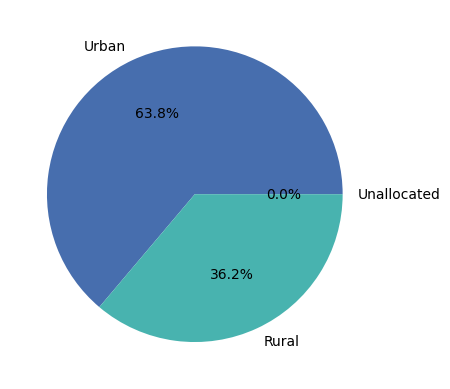

In [7]:
area_counts = accident['Urban_or_Rural_Area'].value_counts()

plt.pie(area_counts,
        labels=area_counts.index,   
        autopct='%1.1f%%',
        colors=['#476EAE', '#48B3AF'])     

plt.show()

## Insight 💡

<ol start="2">
    <h4> <li> <em> About <b>421,678 accidents (63.8%) </b>occurred in urban areas compared to<b> 239,001 accidents (36.2%) </b>in rural areas, indicating that accidents are more concentrated in cities than in rural locations.</em></h4>
    </li>
</ol>
<hr>


<ol start="3">
    <h3><li> Which vehicle types were most frequently involved in accidents in Urban areas?</h3>
    </li>
</ol>

In [8]:
Area_1 = accident.groupby(['Urban_or_Rural_Area','Vehicle_Type']).size().unstack(level=0)
Area_1

Urban_or_Rural_Area,Rural,Unallocated,Urban
Vehicle_Type,,,
Agricultural vehicle,675,0,1272
Bus or coach (17 or more pass seats),9025,2,16851
Car,181922,8,316062
Data missing or out of range,0,0,6
Goods 7.5 tonnes mgw and over,6156,0,11151
Goods over 3.5t. and under 7.5t,2232,0,3864
Minibus (8 - 16 passenger seats),718,0,1258
Motorcycle 125cc and under,5023,0,10246
Motorcycle 50cc and under,2710,0,4893


## Insight 💡

<ol start = 3>
    <li> <h4><em>The most frequently involved type of vehicle in urban accidents is <b>the car, with 316,062</b> recorded cases.</em></h4>
    </li>
    <li> <h4><em>Very few accidents involve <b>Ridden horses (1 rural, 3 urban) or Pedal cycles (70 rural, 127 urban) </b>compared to motor vehicles, highlighting that non-motorized transport contributes minimally to recorded accidents.</em></h4>
    </li>
    <li> <h4><em>Very few accidents involve <b>Ridden horses (1 rural, 3 urban) or Pedal cycles (70 rural, 127 urban) </b>compared to motor vehicles, highlighting that non-motorized transport contributes minimally to recorded accidents.</em></h4>
    </li>
</ul>
<br>    
<hr>


<ol start="4">
    <h3><li> What is total number of accidents were slight, serious, and fatal?</h3>
    </li>
</ol>

In [9]:
Ac_Sev = accident.groupby(['Accident_Severity']).size()
Ac_Sev

Accident_Severity
Fatal        8661
Serious     88217
Slight     563801
dtype: int64

## Insight 💡

<ol start="6">
    <li><h4><em>The majority of accidents are <b>Slight (563,801 cases)</b>, showing that most incidents result in minor damage or injury.</em></h4>
    </li>
    <li><h4><em>Serious accidents account for <b>88,217 cases</b>, which is still significant and highlights notable road safety concerns.</em></h4>
    </li>
    <li><h4><em>Fatal accidents are the <b>least common at 8,661 cases</b>, indicating that while deaths are rare compared to slight accidents, they still represent a critical safety issue.</em></h4>
</li>
</ol>
<hr>


<ol start="5">
    <h3><li> Under which light conditions (daylight, darkness, streetlights) do most accidents occur in urban areas?</h3>
    </li>
</ol>

In [10]:
accident[accident['Urban_or_Rural_Area'] == 'Urban']['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       309521
Darkness - lights lit          104638
Darkness - lighting unknown      4017
Darkness - no lighting           1920
Darkness - lights unlit          1582
Name: count, dtype: int64

## Insight 💡

<ul>
    <li><h4><em>Based on the dataset, in Urban Areas, </em></h4>
    </li>
</ul>
<ol start = 9>
    <li><h4><em>Most accidents happen in <b>daylight (309,521 cases)</b> because more vehicles and people are on the road during the day.</em></h4></li>
    <li><h4><em>The second highest is in <b>darkness with streetlights (104,638 cases)</b>, showing that even with lights, accidents are still common at night.</em></h4></li>
    <ul>
        <br>
        <li><h4><em>This means that in urban areas, accidents mostly occur in well-lit conditions (daytime or streetlights), not just in dark places.</em></h4></li>
    </ul>
    
</ol>
<hr>


<ol start="6">
    <h3><li> What is the correlation between the number of vehicles involved and the number of casualties?</h3>
    </li>
</ol>

In [11]:
accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])

np.float64(0.22888886126927627)

## Insight 💡

<ol start = 11>
    <li><h4><em>There is <b>no strong correlation (0.22888886126927627)</b> between the number of vehicles involved and the number of casualties..</em></h4></li>
    
</ol>
<hr>


<ol start="7">
    <h3><li> What was the least common weather condition during accidents in the month of March?</h3>
    </li>
</ol>

In [19]:
accident.groupby(['Weather_Conditions','Accident Month']).size().unstack()

Accident Month,April,August,December,February,January,July,June,March,May,November,October,September
Weather_Conditions,,,,,,,,,,,,
Fine + high winds,276,298,626,694,1816,315,225,1448,463,1388,579,426
Fine no high winds,45844,44213,35545,37671,35474,46515,48292,43662,47586,40793,47822,47468
Fog or mist,140,52,903,615,434,36,102,209,54,577,278,128
Other,553,664,4113,1996,2948,713,553,952,634,2173,1188,663
Raining + high winds,118,390,944,501,1990,429,292,1055,449,2217,710,520
Raining no high winds,3596,7245,6309,4964,7307,8247,5828,5218,6003,11197,7615,6167
Snowing + high winds,23,2,212,216,188,1,0,162,3,65,11,2
Snowing no high winds,168,11,1902,1746,1435,15,16,288,14,563,67,13
Unknown,1026,1038,1282,1088,1280,1174,1173,1092,1146,1451,1310,1068


## Insight 💡

<ol start = 12>
    <li><h4><em>Most Accidents Happen in Good Weather</b></em></h4></li>
    <ul>
        <li>Most accidents happen when the weather is <b>clear and calm</b>. This shows that <b>good weather doesn't always mean safer driving</b> people might drive faster or pay less attention.</li>
    </ul>
    <li><h4><em>November Has the Most Accidents</em></h4>
    </li>
    <ul>
        <li>The month of <b>November</b> has the <b>highest number of accidents</b>, especially in clear and rainy weather. This could be due to <b>bad lighting, wet roads, or more travel</b>.
</li>
    </ul>
    <li><h4><em>Rainy Weather Increases Accidents</em></h4>
    </li>
    <ul>
        <li><b>Rainy days</b> (even without strong winds) lead to <b>many accidents</b>, especially in <b>July, August, and November</b>. Wet roads make it harder to stop or control vehicles.
</li>
    </ul>
    </ul>
    <li><h4><em>Snowy Weather Accidents Happen in Winter</em></h4>
    </li>
    <ul>
        <li>Most accidents in <b>snowy conditions</b> happen in <b>December, January, and February</b>. Snow and ice make roads slippery and dangerous.
</li>
    </ul>
    <li><h4><em>Many Accidents Have Unknown Weather</em></h4>
    </li>
    <ul>
        <li>Every month, over <b>1,000 accidents</b> were listed with <b>"unknown" weather conditions</b>. This shows that <b>some weather data may be missing or unclear.</b>
</li>
    </ul>
    
</ol>
<hr>


<ol start="8">
    <h3><li> On what month was the highest number of accidents recorded in Rural areas?</h3>
    </li>
</ol>

In [21]:
accident.groupby(['Urban_or_Rural_Area','Accident Month']).size().unstack(level=0)

Urban_or_Rural_Area,Rural,Unallocated,Urban
Accident Month,,,
April,18432,1,33311
August,20998,0,32915
December,19361,3,32472
February,18140,0,31351
January,19540,1,33331
July,21215,1,36229
June,20200,2,36279
March,18806,1,35279
May,20125,2,36225


## Insight 💡

<ol start = 17>
    <li><h4><em>Most Accidents Happen in Urban Areas</b></em></h4></li>
    <ul>
        <li>Most accidents happen when the weather is <b>clear and calm</b>. This shows that <b>good weather doesn't always mean safer driving</b>people might drive faster or pay less attention.</li>
    </ul>
    <li><h4><em>November Has the Most Accidents</em></h4>
    </li>
    <ul>
        <li>The month of <b>November</b> has the <b>highest number of accidents</b>, especially in clear and rainy weather. This could be due to <b>bad lighting, wet roads, or more travel</b>.
</li>
    </ul>
    <li><h4><em>Rainy Weather Increases Accidents</em></h4>
    </li>
    <ul>
        <li><b>Rainy days</b> (even without strong winds) lead to <b>many accidents</b>, especially in <b>July, August, and November</b>. Wet roads make it harder to stop or control vehicles.
</li>
    </ul>
    </ul>
    <li><h4><em>Snowy Weather Accidents Happen in Winter</em></h4>
    </li>
    <ul>
        <li>Most accidents in <b>snowy conditions</b> happen in <b>December, January, and February</b>. Snow and ice make roads slippery and dangerous.
</li>
    </ul>
    <li><h4><em>Many Accidents Have Unknown Weather</em></h4>
    </li>
    <ul>
        <li>Every month, over <b>1,000 accidents</b> were listed with <b>"unknown" weather conditions</b>. This shows that <b>some weather data may be missing or unclear.</b>
</li>
    </ul>
    
</ol>
<hr>


<ol start="9">
    <h3><li> By what percentage did accidents change from 2019 to 2022?</h3>
    </li>
</ol>

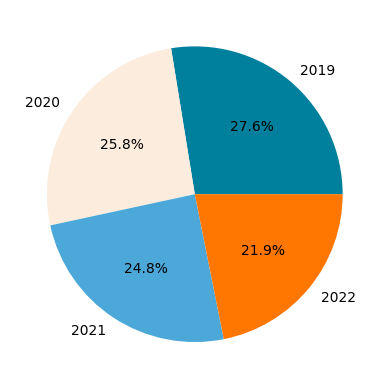

In [28]:
year_counts = accident['Accident Year'].value_counts()

plt.pie(year_counts,
        labels=year_counts.index,   
        autopct='%1.1f%%',
        colors=['#00809D','#FCECDD','#4DA8DA','#FF7601'])     

plt.show()

## Insight 💡

<ol start = 22>
    <li><h4><em>Most Accidents Happen in Urban Areas</b></em></h4></li>
    <ul>
        <li>Most accidents happen when the weather is <b>clear and calm</b>. This shows that <b>good weather doesn't always mean safer driving</b>people might drive faster or pay less attention.</li>
    </ul>
    <li><h4><em>November Has the Most Accidents</em></h4>
    </li>
    <ul>
        <li>The month of <b>November</b> has the <b>highest number of accidents</b>, especially in clear and rainy weather. This could be due to <b>bad lighting, wet roads, or more travel</b>.
</li>
    </ul>
    <li><h4><em>Rainy Weather Increases Accidents</em></h4>
    </li>
    <ul>
        <li><b>Rainy days</b> (even without strong winds) lead to <b>many accidents</b>, especially in <b>July, August, and November</b>. Wet roads make it harder to stop or control vehicles.
</li>
    </ul>
    </ul>
    <li><h4><em>Snowy Weather Accidents Happen in Winter</em></h4>
    </li>
    <ul>
        <li>Most accidents in <b>snowy conditions</b> happen in <b>December, January, and February</b>. Snow and ice make roads slippery and dangerous.
</li>
    </ul>
    <li><h4><em>Many Accidents Have Unknown Weather</em></h4>
    </li>
    <ul>
        <li>Every month, over <b>1,000 accidents</b> were listed with <b>"unknown" weather conditions</b>. This shows that <b>some weather data may be missing or unclear.</b>
</li>
    </ul>
    
</ol>
<hr>